In [9]:
import pandas as pd 
#DATA EXPLORATION AND CLEANING
user_interactions_df= pd.read_csv("user_interactions.csv")
purchase_data_df=pd.read_csv("purchase_data.csv")
website_performanc_df=pd.read_csv("website_performance.csv")

In [10]:
user_interactions_df.head

<bound method NDFrame.head of         User_ID    Page_Viewed  Time_Spent_Seconds
0     User_3198       Homepage                 560
1      User_126  Category Page                 168
2     User_1376  Category Page                 122
3     User_1117      Cart Page                 329
4     User_3683  Category Page                 391
...         ...            ...                 ...
4995  User_3045  Checkout Page                 284
4996  User_1583      Cart Page                 322
4997  User_2627  Checkout Page                 559
4998  User_4976   Product Page                 373
4999  User_1770       Homepage                 104

[5000 rows x 3 columns]>

In [11]:
user_interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [12]:
purchase_data_df.head

<bound method NDFrame.head of       Purchase_ID    User_ID  Product_ID  Transaction_Amount  \
0    Purchase_948  User_3840  Product_19           62.843031   
1    Purchase_905  User_1846   Product_9           21.780079   
2    Purchase_704  User_1700   Product_8          138.264455   
3    Purchase_766  User_4117  Product_15           74.991367   
4     Purchase_36  User_3053   Product_7          162.569998   
..            ...        ...         ...                 ...   
995  Purchase_489  User_2879  Product_14           47.047885   
996  Purchase_741   User_588   Product_1           85.587089   
997  Purchase_587  User_3821  Product_16          162.919467   
998  Purchase_222  User_1804  Product_10           44.435545   
999  Purchase_609  User_3364  Product_14          147.367700   

           Purchase_Time  
0    2023-04-02 16:35:46  
1    2023-04-14 16:38:27  
2    2023-01-21 11:21:31  
3    2023-01-29 04:44:04  
4    2023-05-24 03:30:23  
..                   ...  
995  2023-04

In [13]:
purchase_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [14]:
website_performanc_df.head

<bound method NDFrame.head of          Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0   2023-01-01        5.106652     0.514345         0.047375
1   2023-02-01        7.828199     0.317157         0.062764
2   2023-03-01        3.239983     0.480903         0.050514
3   2023-04-01        5.954509     0.473572         0.057151
4   2023-05-01        9.872398     0.542407         0.089525
5   2023-06-01        7.333456     0.440715         0.048687
6   2023-07-01        3.372264     0.390081         0.048440
7   2023-08-01        7.115272     0.489165         0.038263
8   2023-09-01        8.384957     0.301692         0.063365
9   2023-10-01        2.468395     0.566843         0.065971
10  2023-11-01        4.429745     0.526560         0.065786
11  2023-12-01        5.289363     0.388364         0.082828>

In [15]:
website_performanc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [16]:
print(user_interactions_df.isnull().sum())
print(purchase_data_df.isnull().sum())
print(website_performanc_df.isnull().sum())



User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64
Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64
Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64


In [18]:
#USER BEHAVIOR ANALYSIS
import matplotlib.pyplot as plt 
# Analyze user interactions
most_visited_pages = user_interactions_df['Page_Viewed'].value_counts().nlargest(5)
average_time_spent = user_interactions_df.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()


In [19]:
print(most_visited_pages)
print(average_time_spent)

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64
Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64


In [37]:
# Determine click-through rate for different sections
click_through_rate_homepage = (user_interactions_df['Page_Viewed'] == 'Homepage').mean()
print(click_through_rate_homepage)
click_through_rate_product_categories = (user_interactions_df['Page_Viewed']=='Product Page').mean()
print(click_through_rate_product_categories)

0.209
0.1906


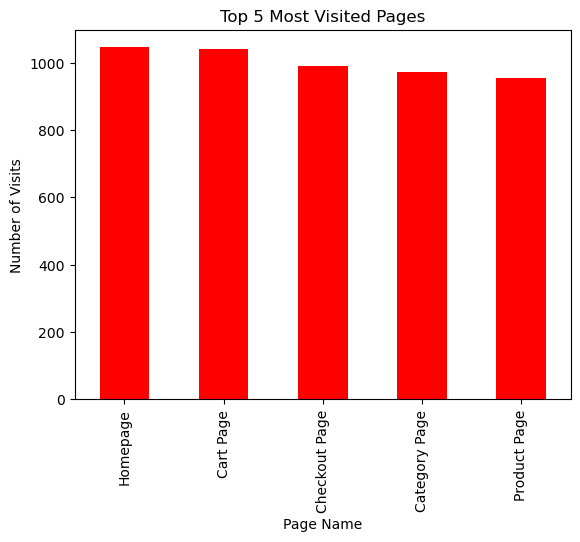

In [23]:
most_visited_pages.plot(kind='bar', color='red')
plt.title('Top 5 Most Visited Pages')
plt.xlabel('Page Name')
plt.ylabel('Number of Visits')
plt.show()

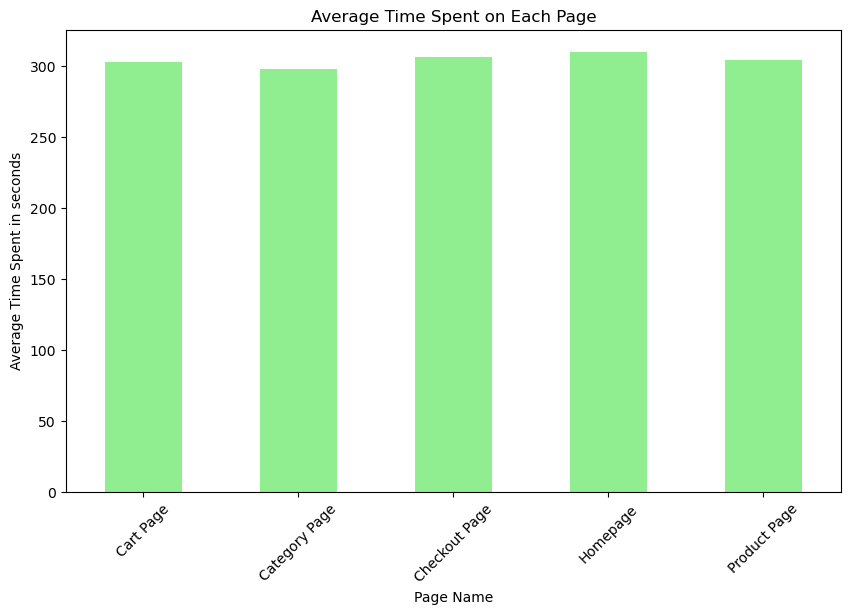

In [25]:
plt.figure(figsize=(10, 6))
average_time_spent.plot(kind='bar', color='lightgreen')
plt.title('Average Time Spent on Each Page')
plt.xlabel('Page Name')
plt.ylabel('Average Time Spent in seconds')
plt.xticks(rotation=45)
plt.show()

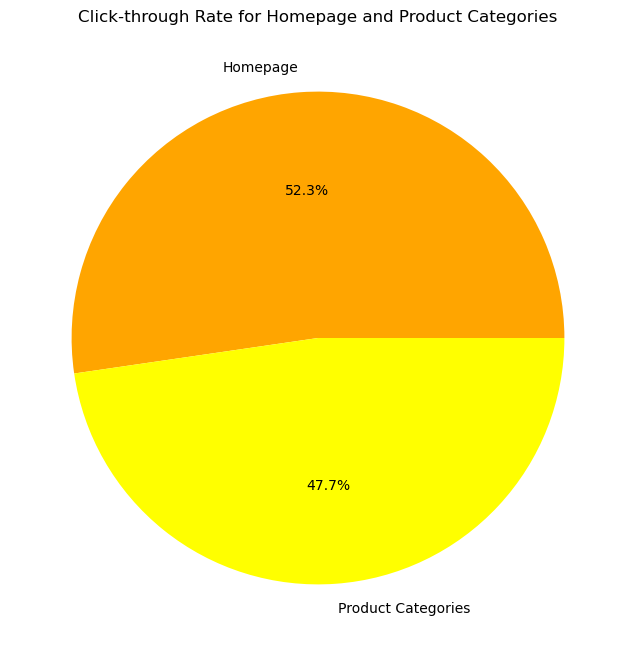

In [38]:
plt.figure(figsize=(8, 8))
click_through_rate = [click_through_rate_homepage, click_through_rate_product_categories]
labels = ['Homepage', 'Product Categories']
plt.pie(click_through_rate, labels=labels, colors=['orange', 'yellow'], autopct='%1.1f%%')
plt.title('Click-through Rate for Homepage and Product Categories')
plt.show()

In [41]:
#PURCHASE ANALYSIS 
total_purchases = purchase_data_df['Transaction_Amount'].count()
total_visits = user_interactions_df['Page_Viewed'].count()
conversion_rate = (total_purchases / total_visits) * 100
print(conversion_rate)

20.0


In [44]:
top_selling_products = purchase_data_df['Product_ID'].value_counts().nlargest(5)
print("\nTop 5 Selling Products:")
print(top_selling_products)



Top 5 Selling Products:
Product_19    66
Product_13    59
Product_4     58
Product_20    58
Product_7     56
Name: Product_ID, dtype: int64


In [52]:
# Explore the relationship between interactions and likelihood of a purchase
# We can create a new DataFrame to group user interactions and calculate the purchase likelihood
interactions_df = user_interactions_df.groupby('User_ID')['Page_Viewed'].value_counts().unstack(fill_value=0)
interactions_df

Page_Viewed,Cart Page,Category Page,Checkout Page,Homepage,Product Page
User_ID,,,,,
User_1,0,0,0,2,0
User_100,0,0,0,1,0
User_1000,1,0,0,0,0
User_1002,0,0,0,1,0
User_1004,0,0,0,0,1
...,...,...,...,...,...
User_995,0,1,1,0,0
User_996,1,1,0,0,0
User_997,2,0,0,0,0


In [53]:
# Calculate the number of users who made a purchase
users_with_purchase = purchase_data_df['User_ID'].nunique()
users_with_purchase

916

In [55]:
# Calculate the number of users with at least one interaction
users_with_interaction = interactions_df[interactions_df.sum(axis=1) > 0].shape[0]
users_with_interaction

3210

In [56]:
# Calculate the number of users who made a purchase after interacting with the website
users_with_purchase_after_interaction = purchase_data_df[purchase_data_df['User_ID'].isin(interactions_df.index)].nunique()
users_with_purchase_after_interaction 


Purchase_ID           509
User_ID               610
Product_ID             20
Transaction_Amount    666
Purchase_Time         666
dtype: int64

In [57]:
# Calculate the likelihood of a purchase after interaction
likelihood_purchase_after_interaction = (users_with_purchase_after_interaction / users_with_interaction) * 100
likelihood_purchase_after_interaction

Purchase_ID           15.856698
User_ID               19.003115
Product_ID             0.623053
Transaction_Amount    20.747664
Purchase_Time         20.747664
dtype: float64

In [58]:
#Cohort Analysis
purchase_data_df['first_purchase_month'] = pd.to_datetime(purchase_data_df.groupby('User_ID')['Purchase_Time'].transform('min')).dt.to_period('M')

# Group users by their first purchase month and find the total number of unique users in each cohort
cohort_group = purchase_data_df.groupby('first_purchase_month')['User_ID'].nunique()

# Calculate user retention for each cohort
retention_rate = cohort_group.divide(cohort_group.iloc[0]) * 100

print("Cohort Analysis - User Retention:")
print(retention_rate)

# Determine the lifetime value (LTV) of customers acquired during different time periods
# Group users by their first purchase month and calculate the total revenue generated from each cohort
revenue_per_cohort = purchase_data_df.groupby('first_purchase_month')['Transaction_Amount'].sum()

# Calculate the average revenue per user in each cohort
average_revenue_per_user = revenue_per_cohort.divide(cohort_group)

# Calculate the LTV for each cohort
# Assuming a customer lifetime of 12 months for illustration purposes
customer_lifetime = 12
ltv_per_cohort = average_revenue_per_user * customer_lifetime

print("\nLifetime Value (LTV) of Customers by Cohort:")
print(ltv_per_cohort)

Cohort Analysis - User Retention:
first_purchase_month
2023-01    100.000000
2023-02     82.236842
2023-03     94.736842
2023-04     90.131579
2023-05     82.236842
2023-06     79.605263
2023-07     73.684211
Freq: M, Name: User_ID, dtype: float64

Lifetime Value (LTV) of Customers by Cohort:
first_purchase_month
2023-01    1444.697273
2023-02    1421.345715
2023-03    1393.133028
2023-04    1397.830773
2023-05    1426.701391
2023-06    1297.156577
2023-07    1352.813667
Freq: M, dtype: float64


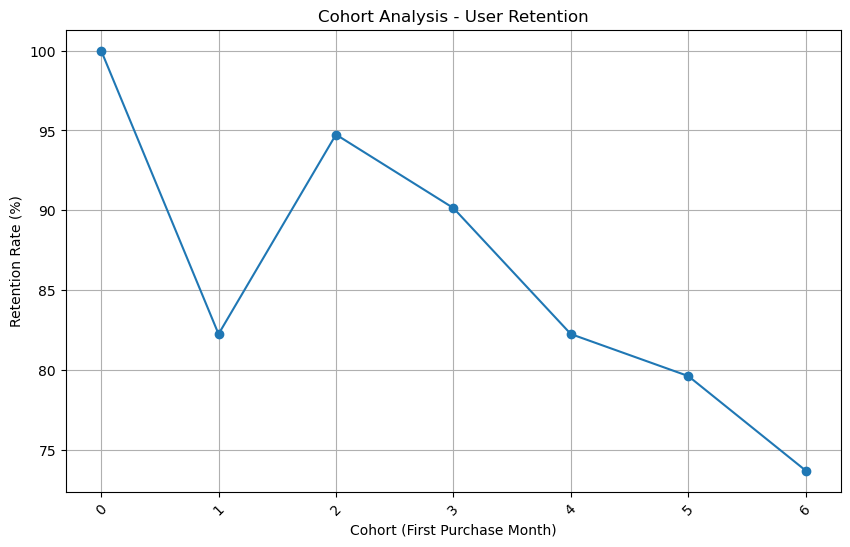

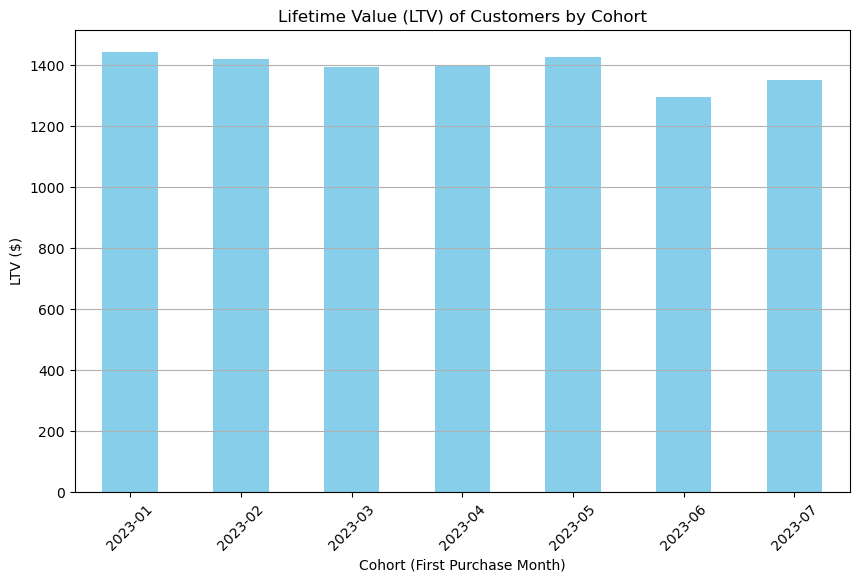

In [60]:
# Plot the retention rate over time
plt.figure(figsize=(10, 6))
plt.plot(retention_rate.values, marker='o', linestyle='-')
plt.title('Cohort Analysis - User Retention')
plt.xlabel('Cohort (First Purchase Month)')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the LTV of customers by cohort
plt.figure(figsize=(10, 6))
ltv_per_cohort.plot(kind='bar', color='skyblue')
plt.title('Lifetime Value (LTV) of Customers by Cohort')
plt.xlabel('Cohort (First Purchase Month)')
plt.ylabel('LTV ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()





In [67]:
#Website Performance Optimization
print(website_performanc_df.describe())
# Propose strategies for improvement based on the analysis
# 1. Optimize page load time for reduced bounce rate and smooth functioning of the websites. This would help users to
# access the websites more easily.
# 2. To increase conversion rates, employ clear actions and user-friendly navigation.

       Page_Load_Time  Bounce_Rate  Conversion_Rate
count       12.000000    12.000000        12.000000
mean         5.866266     0.452650         0.060056
std          2.288288     0.086482         0.014993
min          2.468395     0.301692         0.038263
25%          4.165375     0.389651         0.048626
50%          5.621936     0.477238         0.059957
75%          7.457142     0.517399         0.065832
max          9.872398     0.566843         0.089525


In [ ]:
import time

# Function to update the real-time dashboard
def update_dashboard():
    while True:
        
        latest_data = pd.read_csv("website_performanc_df.csv")
        
        # Plot real-time website performance metrics
        # Example: Line plot for page load time
        plt.figure(figsize=(10, 6))
        plt.plot(latest_data['Month'], latest_data['Page_Load_Time'], marker='o', linestyle='-')
        plt.title('Real-time Page Load Time')
        plt.xlabel('Timestamp')
        plt.ylabel('Page Load Time (seconds)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
        time.sleep(60)  # Update the dashboard every minute

update_dashboard()